In [1]:
# Pandas
from config import DB_USER, DB_PASS, DB_ENDPOINT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [2]:
 # Create Engine
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_ENDPOINT}")
conn = engine.connect()

In [3]:
# Query All Records in the the Database
data = pd.read_sql("SELECT * FROM historical", conn, index_col="index")
data.head()

,crypto,time,open,high,low,close,volume,trade
index,,,,,,,,
0,bitcoin_usdt,1.511914e+09,9896.79000000,11300.03000000,8520.00000000,9687.88000000,13352.53871500,8662.63236200
1,bitcoin_usdt,1.512000e+09,9687.88000000,10900.00000000,8850.80000000,9838.96000000,9389.57432900,5360.66024200
2,bitcoin_usdt,1.512086e+09,9837.00000000,10898.00000000,9380.00000000,10782.99000000,6134.92363300,3269.86858800
3,bitcoin_usdt,1.512173e+09,10775.04000000,11190.00000000,10620.00000000,10890.01000000,4765.43975700,2390.19427500
4,bitcoin_usdt,1.512259e+09,10902.69000000,11825.00000000,10500.00000000,11165.41000000,5346.63652400,2574.24618700


In [4]:
ethereum_df = data[data["crypto"] == "ethereum_usdt"]
ethereum_df = ethereum_df.reset_index(drop=True)
ethereum_df

,crypto,time,open,high,low,close,volume,trade
0,ethereum_usdt,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,ethereum_usdt,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,ethereum_usdt,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,ethereum_usdt,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,ethereum_usdt,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...,...
1457,ethereum_usdt,1.637798e+09,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,ethereum_usdt,1.637885e+09,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,ethereum_usdt,1.637971e+09,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,ethereum_usdt,1.638058e+09,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [5]:
# drop the crypto column which is just a name
ethereum_df = ethereum_df.drop("crypto", axis=1)
ethereum_df

,time,open,high,low,close,volume,trade
0,1.511914e+09,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,1.512000e+09,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,1.512086e+09,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,1.512173e+09,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,1.512259e+09,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
1457,1.637798e+09,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,1.637885e+09,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,1.637971e+09,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,1.638058e+09,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [6]:
ethereum_df["time"] = pd.to_datetime(ethereum_df['time'], unit="s")
ethereum_df

,time,open,high,low,close,volume,trade
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000
...,...,...,...,...,...,...,...
1457,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000
1458,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000
1459,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000
1460,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000


In [7]:
# make the predictions 30 days in the future for the target.
projection = 30
ethereum_df["prediction"] = ethereum_df["close"].shift(-projection)
ethereum_df

,time,open,high,low,close,volume,trade,prediction
0,2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000,733.99000000
1,2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000,681.06000000
2,2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000,733.98000000
3,2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000,754.99000000
4,2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000,855.28000000
...,...,...,...,...,...,...,...,...
1457,2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000,NaN
1458,2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000,NaN
1459,2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000,NaN
1460,2021-11-28,4095.29000000,4298.51000000,3964.00000000,4294.78000000,346471.35510000,174386.81870000,NaN


In [8]:
ethereum_df = ethereum_df.set_index("time")
ethereum_df

,open,high,low,close,volume,trade,prediction
time,,,,,,,
2017-11-29,466.17000000,515.00000000,385.00000000,421.70000000,51313.49571000,23825.39377000,733.99000000
2017-11-30,421.92000000,460.00000000,387.01000000,427.43000000,45184.22265000,24018.42012000,681.06000000
2017-12-01,428.05000000,465.97000000,413.74000000,457.51000000,33072.21995000,19043.24922000,733.98000000
2017-12-02,457.53000000,471.91000000,445.00000000,457.63000000,25796.14000000,12336.59141000,754.99000000
2017-12-03,457.31000000,485.90000000,440.11000000,460.30000000,24490.05997000,12239.10293000,855.28000000
...,...,...,...,...,...,...,...
2021-11-25,4270.10000000,4550.00000000,4248.27000000,4524.85000000,445868.24340000,231824.31930000,NaN
2021-11-26,4524.48000000,4551.00000000,3913.00000000,4041.20000000,720245.16120000,348872.86610000,NaN
2021-11-27,4041.20000000,4183.66000000,4028.34000000,4095.29000000,275326.52020000,136157.34820000,NaN


In [9]:
ethereum_df.dtypes

open          object
high          object
low           object
close         object
volume        object
trade         object
prediction    object
dtype: object

In [10]:
# convert to numerical
ethereum_df = ethereum_df.astype({"open": float, "high": float, "low":float, "close": float, "volume": float, "trade": float, "prediction": float})
ethereum_df.dtypes

open          float64
high          float64
low           float64
close         float64
volume        float64
trade         float64
prediction    float64
dtype: object

In [11]:
# remove the last 14 rows from the data (days we want to predict as future dates)
X = ethereum_df[:-projection]

In [12]:
# Set the features
X = X.drop("prediction", axis=1)
X

,open,high,low,close,volume,trade
time,,,,,,
2017-11-29,466.17,515.00,385.00,421.70,51313.49571,23825.39377
2017-11-30,421.92,460.00,387.01,427.43,45184.22265,24018.42012
2017-12-01,428.05,465.97,413.74,457.51,33072.21995,19043.24922
2017-12-02,457.53,471.91,445.00,457.63,25796.14000,12336.59141
2017-12-03,457.31,485.90,440.11,460.30,24490.05997,12239.10293
...,...,...,...,...,...,...
2021-10-26,4220.36,4297.00,4090.21,4131.52,414498.15990,205853.06890
2021-10-27,4131.52,4307.00,3909.00,3922.00,704604.25000,342946.25220
2021-10-28,3921.99,4295.00,3890.17,4286.02,626378.50550,331721.67970


In [13]:
# remove the last 14 rows from the data (days we want to predict)
y = ethereum_df[:-projection]

In [14]:
# Set the target
y = y["prediction"]
y

time
2017-11-29     733.99
2017-11-30     681.06
2017-12-01     733.98
2017-12-02     754.99
2017-12-03     855.28
               ...   
2021-10-26    4524.85
2021-10-27    4041.20
2021-10-28    4095.29
2021-10-29    4294.78
2021-10-30    4444.53
Name: prediction, Length: 1432, dtype: float64

LR: -1.537829 (1.802710)
Lasso: -0.361790 (0.703261)
Ridge: -0.885296 (1.027952)
RF: -0.884184 (0.995687)
XGBOOST: -1.085008 (0.906050)
NN: 0.345187 (0.138806)
KNN: -6.526075 (5.730674)
SVR: -11.748333 (13.381973)


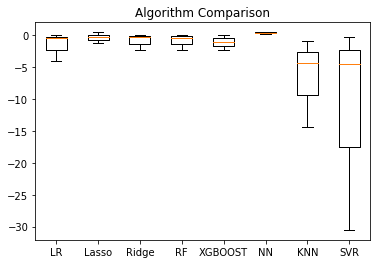

In [15]:
# perform cross validation
import warnings
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score


warnings.simplefilter("ignore")

models = []
models.append(('LR', LinearRegression(normalize=True)))
models.append(('Lasso', Lasso(normalize=True))) 
models.append(('Ridge', Ridge(normalize=True))) 
models.append(('RF', RandomForestRegressor(n_estimators = 200)))
models.append(('XGBOOST', XGBRegressor(n_estimators = 200, verbosity = 0)))
models.append(('NN', MLPRegressor(solver = 'lbfgs')))
models.append(('KNN', KNeighborsRegressor()))
models.append(('SVR', SVR(gamma='auto')))

# Evaluate each model in turn
results = []
names = []
for name, model in models:
    tscv = TimeSeriesSplit(n_splits=3)
    cv_results = cross_val_score(model, X, y, cv=tscv, scoring='r2')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
    #print("TRAIN:", train_index, "TEST:", test_index)
    
    
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

We can see that Linear Regression, Lasso and NN models appear to perform the best. Serdar is already building a NN model, so we will dig further into Lasso.

Are Low R-squared Values Always a Problem?
No! Regression models with low R-squared values can be perfectly good models for several reasons.

Some fields of study have an inherently greater amount of unexplainable variation. In these areas, your R2 values are bound to be lower. For example, studies that try to explain human behavior generally have R2 values less than 50%. People are just harder to predict than things like physical processes.

Fortunately, if you have a low R-squared value but the independent variables are statistically significant, you can still draw important conclusions about the relationships between the variables. Statistically significant coefficients continue to represent the mean change in the dependent variable given a one-unit shift in the independent variable. Clearly, being able to draw conclusions like this is vital.

In [16]:
# We need to set our training and testing data.
# We want all of the data except the last 30 days to train on, and we will test on the last 30 days, 
# excluding the last 14 days we removed to predict for.

#remove the last X (projection) number of days we want to predict for
X_train = ethereum_df[:-projection]
#remove last 30 days we want to keep as test data and drop our label which is the prediction column
X_train = X_train[:-30].drop("prediction",axis=1)


y_train = ethereum_df[:-projection]
y_train = y_train[:-30]
y_train = y_train["prediction"]
y_train

time
2017-11-29     733.99
2017-11-30     681.06
2017-12-01     733.98
2017-12-02     754.99
2017-12-03     855.28
               ...   
2021-09-26    4131.52
2021-09-27    3922.00
2021-09-28    4286.02
2021-09-29    4418.89
2021-09-30    4322.68
Name: prediction, Length: 1402, dtype: float64

In [17]:
# Our testing set will be the last 30 days excluding the dates we want to predict for.
X_test = ethereum_df[:-projection]
# Just the last 30 days
X_test = X_test[-30:].drop("prediction", axis=1)
X_test

y_test = ethereum_df[:-projection]
y_test = y_test[-30:]
y_test = y_test["prediction"]
y_test

time
2021-10-01    4287.21
2021-10-02    4319.43
2021-10-03    4589.89
2021-10-04    4603.35
2021-10-05    4532.32
2021-10-06    4474.24
2021-10-07    4518.00
2021-10-08    4612.59
2021-10-09    4807.98
2021-10-10    4732.33
2021-10-11    4628.78
2021-10-12    4719.00
2021-10-13    4665.46
2021-10-14    4644.28
2021-10-15    4626.50
2021-10-16    4563.78
2021-10-17    4209.76
2021-10-18    4287.80
2021-10-19    3996.90
2021-10-20    4294.76
2021-10-21    4412.17
2021-10-22    4258.31
2021-10-23    4085.97
2021-10-24    4339.44
2021-10-25    4269.36
2021-10-26    4524.85
2021-10-27    4041.20
2021-10-28    4095.29
2021-10-29    4294.78
2021-10-30    4444.53
Name: prediction, dtype: float64

In [18]:
model = Lasso(normalize=True)

model.fit(X_train, y_train)
print(model.score(X_test,y_test))

-8.647400775261643


In [ ]:
pred = model.predict(X_test)


In [19]:
unseen_data = ethereum_df[-projection:]
unseen_data = unseen_data.drop("prediction", axis=1)
unseen_data

,open,high,low,close,volume,trade
time,,,,,,
2021-10-31,4322.68,4399.14,4164.35,4287.21,412856.28930,207029.19300
2021-11-01,4287.48,4386.58,4146.30,4319.43,417620.70730,208433.93650
2021-11-02,4319.43,4599.60,4284.43,4589.89,468184.79301,245450.71120
2021-11-03,4589.68,4665.87,4455.00,4603.35,448658.35125,221693.79026
2021-11-04,4603.35,4606.65,4420.08,4532.32,368218.25695,180789.48190
2021-11-05,4532.31,4570.05,4438.80,4474.24,305651.72440,152155.85650
2021-11-06,4474.24,4530.00,4326.17,4518.00,322154.09730,162175.62780
2021-11-07,4518.00,4637.98,4502.37,4612.59,243596.59520,124167.19250
2021-11-08,4612.59,4822.97,4612.00,4807.98,391102.31806,202324.49531


In [20]:
predictions = model.predict(unseen_data)
data = pd.DataFrame()
data["actual"] = unseen_data["close"]
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
time,,,,
2021-10-31,4287.21,4476.125683,188.915683,4.406495
2021-11-01,4319.43,4457.035204,137.605204,3.185726
2021-11-02,4589.89,4604.687008,14.797008,0.322383
2021-11-03,4603.35,4784.747190,181.397190,3.940547
2021-11-04,4532.32,4746.390165,214.070165,4.723192
2021-11-05,4474.24,4765.302053,291.062053,6.505285
2021-11-06,4518.00,4646.220524,128.220524,2.837993
2021-11-07,4612.59,4831.784292,219.194292,4.752087
2021-11-08,4807.98,4950.563901,142.583901,2.965568


In [21]:
print(data["difference (%)"].mean())

3.8831801895170153


The model prediction is only off by -0.12% on average!

<AxesSubplot:xlabel='time'>

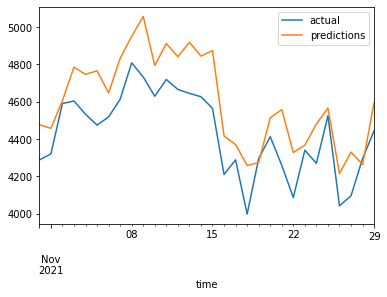

In [22]:
#plot chart
data.plot(y=["actual", "predictions"])

In [23]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = ethereum_df.drop("prediction",axis=1).columns.tolist()
data

,scores,features
0,0.000000,open
1,0.000000,high
2,1.060185,low
3,0.000000,close
4,0.000000,volume
5,0.000033,trade


<AxesSubplot:xlabel='features'>

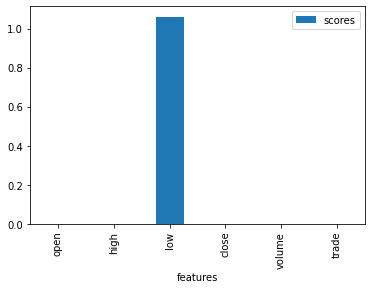

In [24]:
data.plot(kind="bar", x="features", y="scores")

it seems the low and the close are the most relevant features

In [25]:
model = LinearRegression(normalize=True)

model.fit(X_train, y_train)
print(model.score(X_test,y_test))

-6.209596205147941


In [26]:
unseen_data = ethereum_df[-projection:]
unseen_data = unseen_data.drop("prediction", axis=1)
unseen_data

,open,high,low,close,volume,trade
time,,,,,,
2021-10-31,4322.68,4399.14,4164.35,4287.21,412856.28930,207029.19300
2021-11-01,4287.48,4386.58,4146.30,4319.43,417620.70730,208433.93650
2021-11-02,4319.43,4599.60,4284.43,4589.89,468184.79301,245450.71120
2021-11-03,4589.68,4665.87,4455.00,4603.35,448658.35125,221693.79026
2021-11-04,4603.35,4606.65,4420.08,4532.32,368218.25695,180789.48190
2021-11-05,4532.31,4570.05,4438.80,4474.24,305651.72440,152155.85650
2021-11-06,4474.24,4530.00,4326.17,4518.00,322154.09730,162175.62780
2021-11-07,4518.00,4637.98,4502.37,4612.59,243596.59520,124167.19250
2021-11-08,4612.59,4822.97,4612.00,4807.98,391102.31806,202324.49531


In [27]:
predictions = model.predict(unseen_data)
data = pd.DataFrame()
data["actual"] = unseen_data["close"]
data["predictions"] = predictions
data["difference ($)"] = data["predictions"] - data["actual"]
data["difference (%)"] = data["difference ($)"] / data["actual"] *100
data

,actual,predictions,difference ($),difference (%)
time,,,,
2021-10-31,4287.21,4681.032970,393.822970,9.185997
2021-11-01,4319.43,4689.400683,369.970683,8.565266
2021-11-02,4589.89,4791.295877,201.405877,4.388033
2021-11-03,4603.35,5063.548598,460.198598,9.997037
2021-11-04,4532.32,5052.926694,520.606694,11.486539
2021-11-05,4474.24,5012.111747,537.871747,12.021522
2021-11-06,4518.00,4967.101711,449.101711,9.940277
2021-11-07,4612.59,5089.222601,476.632601,10.333297
2021-11-08,4807.98,5187.586279,379.606279,7.895338


In [28]:
print(data["difference (%)"].mean())

8.153908124848744


<AxesSubplot:xlabel='time'>

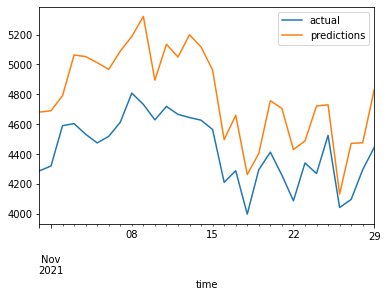

In [29]:
#plot chart
data.plot(y=["actual", "predictions"])

In [30]:
data = pd.DataFrame()
data["scores"] = model.coef_
data["features"] = ethereum_df.drop("prediction",axis=1).columns.tolist()
data

,scores,features
0,0.738969,open
1,-1.564145,high
2,0.979146,low
3,0.995142,close
4,0.000026,volume
5,0.000155,trade


<AxesSubplot:xlabel='features'>

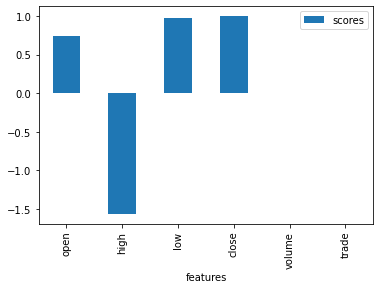

In [31]:
data.plot(kind="bar", x="features", y="scores")